## Verbrannte Kalorien auf Basis Trainingsdauer einschätzen

In diesem Projekt möchten wir verbrannte Kalorien auf Basis von Trainingsdauer mittels linearer Regression berechnen.

Im ersten Schritt importieren wir einige Module:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import seaborn as sns

### Data

Für unser Projekt haben wir zwei csv-Dateien vorbereitet: `exercise.csv` und `calories.csv`  
Diese Dateien enthalten individuelle Informationen von anonymen Personen aus einem imaginären Fitnessstudio.  
Wir lesen die Inhalte dieser Dateien in unser Projekt ein und bilden damit einen Dataframe.

In [3]:
exercise_df = pd.read_csv("C:/Users/OlhaIshchenko/Documents/Daten_Analyse/unterricht/csv_Datei/exercise.csv")

In [4]:
calories_df = pd.read_csv("C:/Users/OlhaIshchenko/Documents/Daten_Analyse/unterricht/csv_Datei/calories.csv")

In [5]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise_df.shape

(15000, 8)

In [7]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
calories_df.shape

(15000, 2)

Jetzt bilden wir aus zwei Dataframes einen Dataframe, indem wir die beiden an einander anhängen:

In [9]:
df = pd.concat([exercise_df, calories_df['Calories']], axis=1, join='inner')
df.set_index('User_ID', inplace=True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df_1= exercise_df.merge(calories_df, on='User_ID', how='inner')
df_1 = df_1.set_index('User_ID')
df_1.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Einige allgmeine Informationen zum Dataframe:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [12]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Visualisierung
Um eine allgemeine Vorstellung vom Zusammenhang zwischen verbrannten Kalorien und der Trainingsdauer zu bekommen, visualisieren wir unseren Dataframe auf zwei Spalten `Duration` und `Calories`

<Axes: xlabel='Duration', ylabel='Calories'>

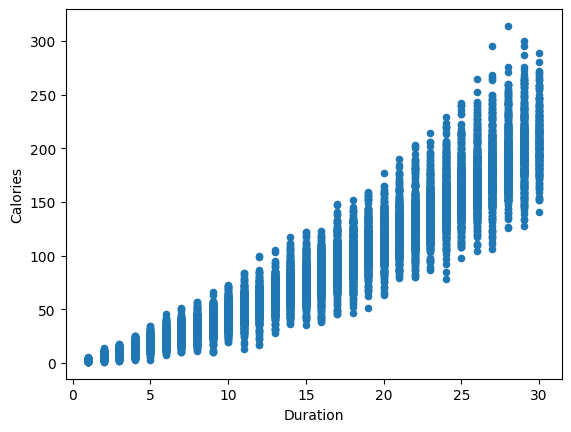

In [13]:
df.plot(x='Duration', y='Calories', kind='scatter')

In [14]:
df[['Duration', 'Calories']].corr()

,Duration,Calories
Duration,1.000000,0.955421
Calories,0.955421,1.000000


In [15]:
df_numerical = df[['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories']]
df_numerical.corr()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

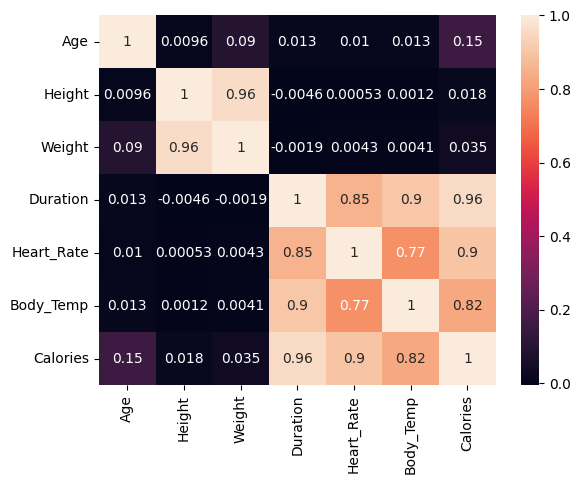

In [16]:
sns.heatmap(df_numerical.corr(), annot=True)

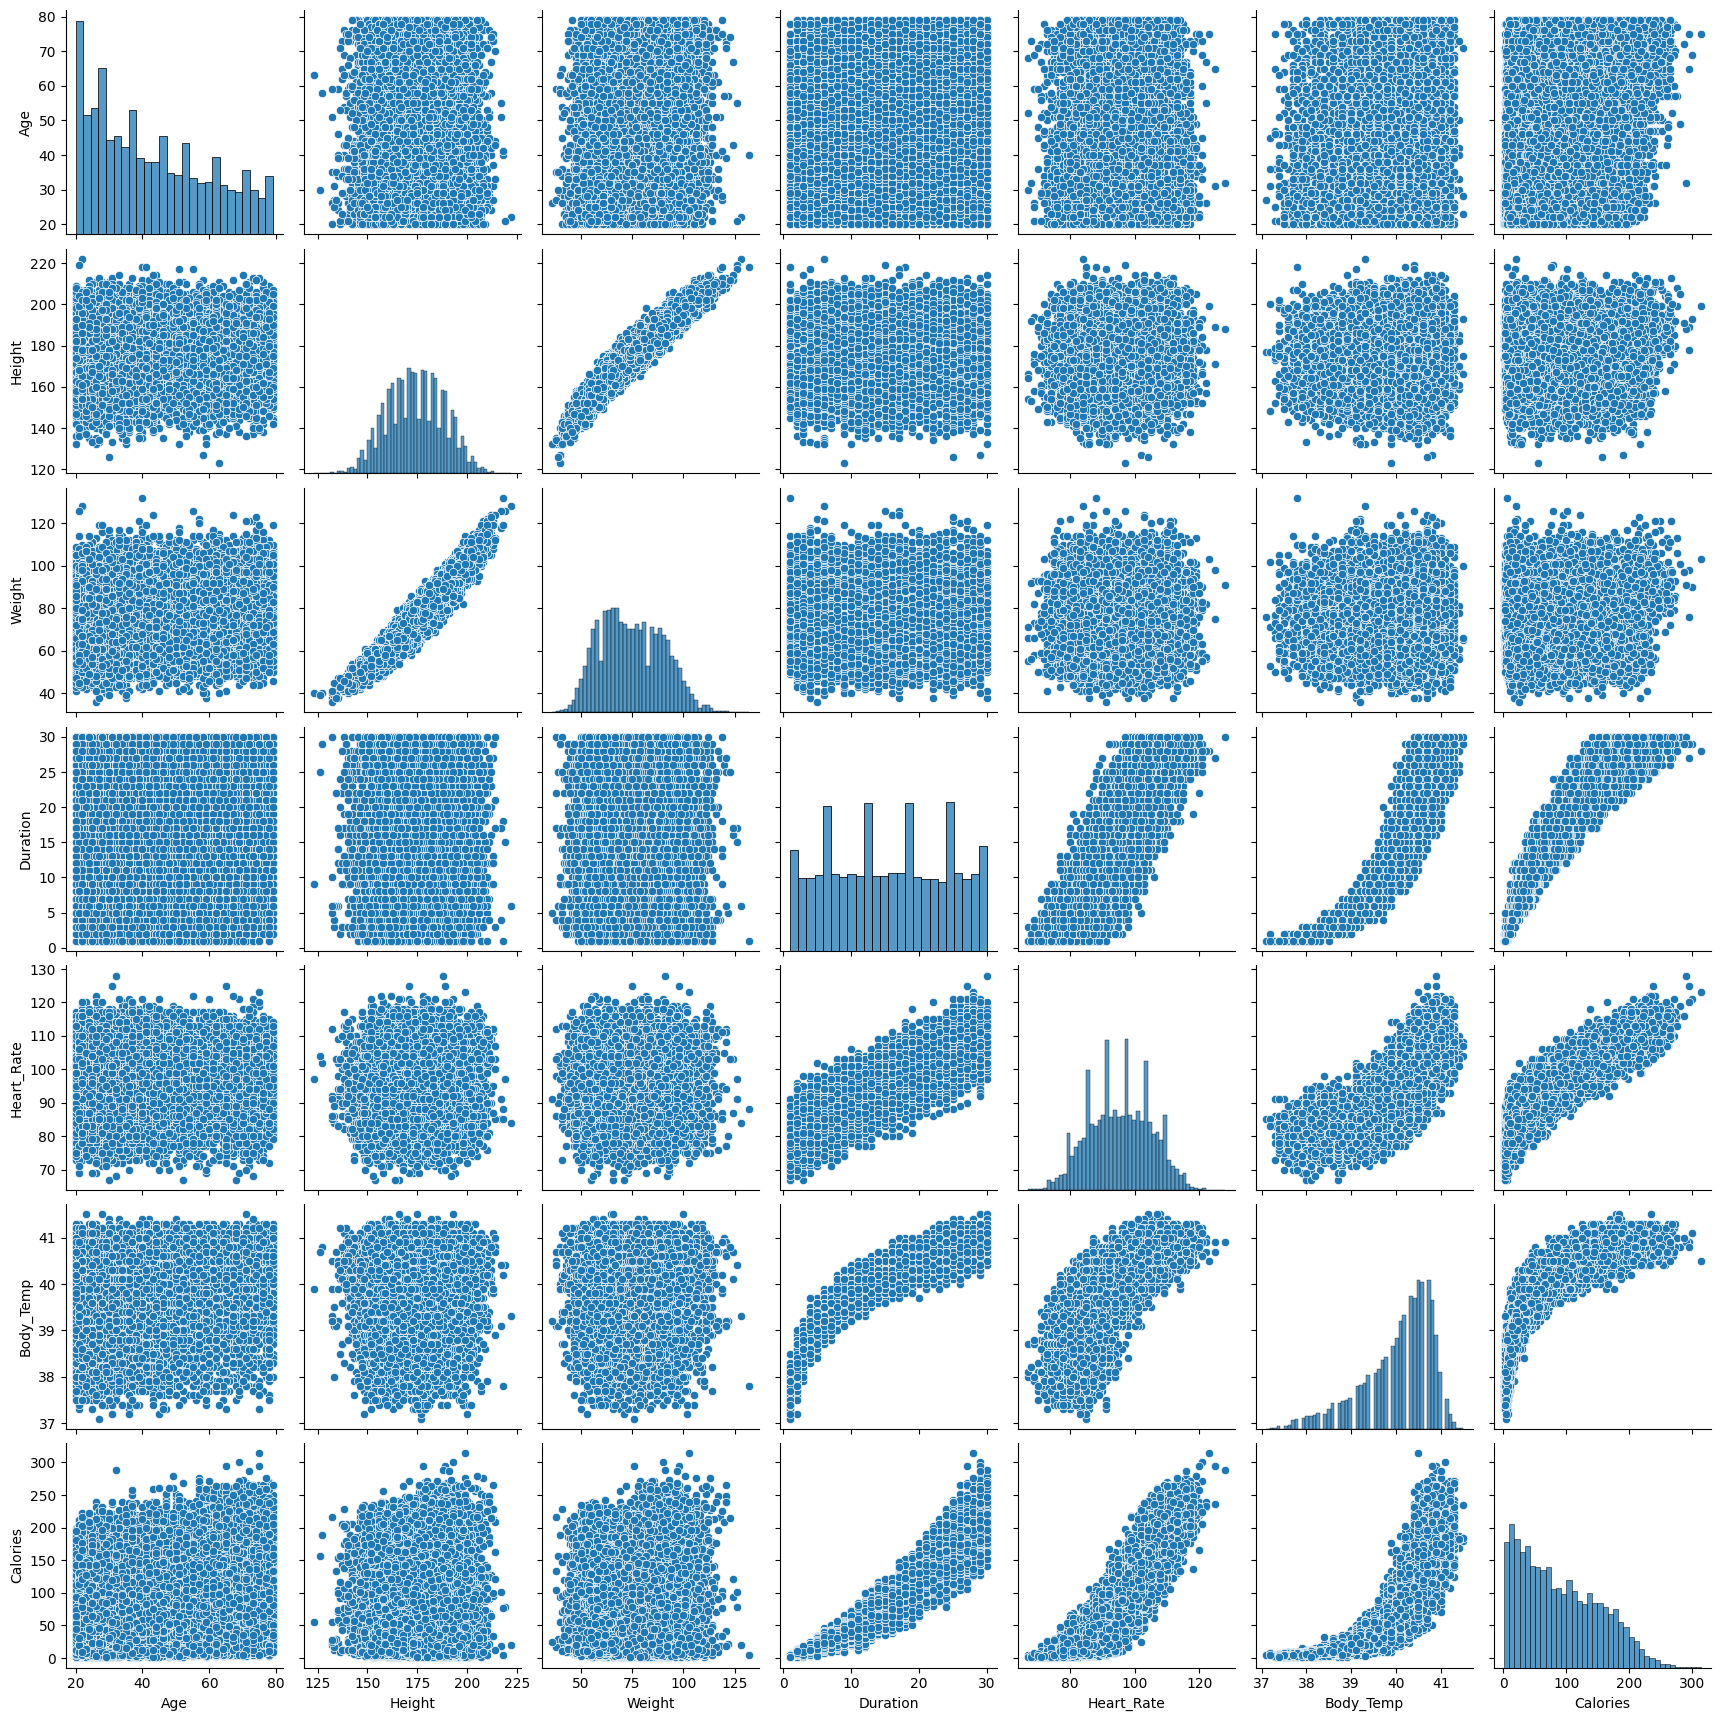

In [17]:
sns.pairplot(df)

### Einschätzung durch lineare Regression

In diesem Schritt möchten wir anhand lineare Regression die Menge der verbrannten Kalorien auf Basis der Trainingsdauer einschätzen.  

Dazu benötigen wir ein Modell.

**Erstelle ein lineares Modell**

In [18]:
lm = LinearRegression()

**Test-Train-Split**   

Jetzt muss das Modell trainiert und getestet werden.
Teile den Dataframe in zwei Teilen ein, indem 75% der Daten zum Modelltraining und der Rest zum Testen benutzt werden.

In [19]:
X = df[['Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25, 
                                                    random_state=42)

**Modell trainieren** 

Trainiere jetzt das Modell anhand Trainingset und ermittle `coef_` und `intercept_` -Attribute.

In [21]:
lm.fit(X_train, y_train)

LinearRegression()

**Modell testen**

Teste das Modell anhand Testingset und ermittle die Genauigkeit des Modells.

In [22]:
lm.score(X_train,y_train)

0.9467583997392839

In [23]:
lm.score(X_test, y_test)

0.9447554468268637

**Eine Einschätzung machen**

Schätze anhand des trainierten Modells ein, wie viele Kalorien im Durchschnitt bei einem Aufenthalt von 60 Minuten in Fitnessstudio verbrannt werden können.

In [24]:
lm.predict([[60,100,40]])

c:\Users\OlhaIshchenko\Documents\Daten_Analyse\unterricht\.my_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([393.28500167])

**Fazit**

In wiefern findest du dieses Modell für die Einschätzung sinnvoll? Reicht nur die Trainingsdauer als Feature aus, um eine qualitative Einschätzung zu liefern? Bitte ausführlich erläutern.

In [25]:
# Antwort

Vielen Dank!